In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import rasterio
from rasterio.plot import show
import geopandas as gpd

PROJ: proj_create_from_database: Cannot find proj.db


This notebook reads in and plots some of the mapspam https://www.mapspam.info/ data. 

To run this notebook, you will first need to download maps from 
https://www.mapspam.info/data/
This notebook assumes you are using the latest (as of May 2022) data "SPAM 2010 v2.0 Global Data (Updated 2020-07-15)"

1. Download the GeoTIFF files for each of:
* Harvested Area
* Physical Area
* Yield
* Production
* Value of Production

2. Unzip the results. This will create 5 folders each containing ?? files

In this notebook, the values are extracted and stored in a way that is easy to manage, ready for reading into other scripts.

In [2]:
dirname = 'C:/Users/Sarah Bridle/Dropbox/scratch/food/mapspam/dl_20220510/'
mapspam_dirnames = ['spam2010v2r0_global_harv_area.geotiff', 
                 'spam2010v2r0_global_phys_area.geotiff', 
                 'spam2010v2r0_global_yield.geotiff',
                 'spam2017v2r1_ssa_prod.geotiff',
                 'spam2017v2r1_ssa_val_prod.geotiff']
mapspam_dirname = mapspam_dirnames[2]
filename = dirname+mapspam_dirname+'/spam2010V2r0_global_Y_WHEA_A'+'.tif'

In [3]:
dataset = rasterio.open(filename)

In [4]:
# check number of bands
dataset.count

1

In [5]:
dataset.bounds

BoundingBox(left=-180.0, bottom=-89.99928, right=179.99856, top=90.0)

In [6]:
dataset.width

4320

In [7]:
dataset.height

2160

In [8]:
dataset.transform

Affine(0.083333, 0.0, -180.0,
       0.0, -0.083333, 90.0)

In [9]:
dataset.crs

In [10]:
# why no crs??

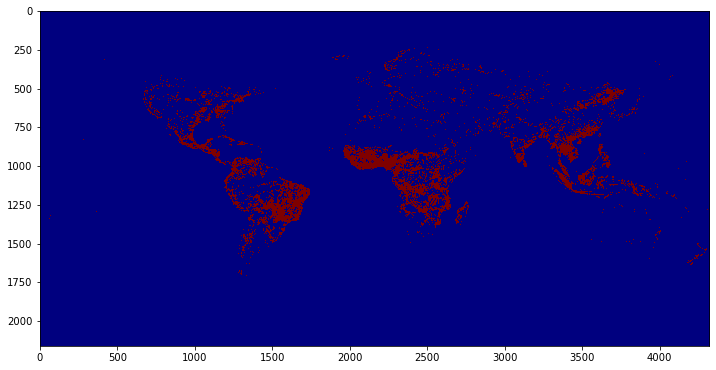

In [11]:
# simple plot of band 1 (i.e. all the data) - ignoring bounding box etc
stuff = (dataset.read(1)==0).astype(int)
plt.figure(figsize = (12,12))
plt.imshow(stuff, cmap='jet', resample=None, vmin = 0, vmax = 1, interpolation = 'none')


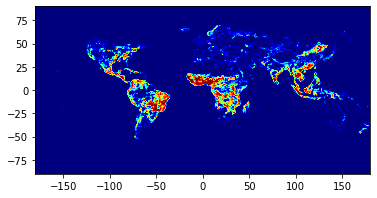

<AxesSubplot:>

In [12]:
# Now use the rasterio tools to plot it properly
show((dataset.read()==0).astype(int), transform=dataset.transform, cmap = 'jet')

In [13]:
# Take a look at a chunk, around the max value
ind = np.unravel_index(np.argmax(dataset.read(1), axis=None), dataset.read(1).shape)
ind

(598, 2398)

In [14]:
(dataset.read()==0).astype(int)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [15]:
(dataset.read(1)[ind[0]:ind[0]+10,ind[1]:ind[1]+10]==0).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]])

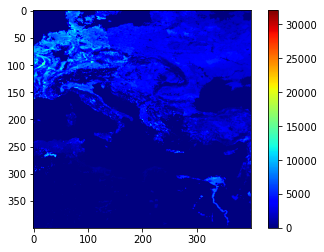

In [16]:
half_width=200
data_subset = dataset.read(1)[ind[0]-half_width:ind[0]+half_width,ind[1]-half_width:ind[1]+half_width]
fig, ax1 = plt.subplots()
pos = plt.imshow(data_subset, cmap='jet')
fig.colorbar(pos, ax=ax1)

In [17]:
# renamed file to preserve as much as possible of directory structure
border_file = '../../data/land/BoundaryLine_download/Data/bdline_gb.gpkg' 
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
counties = counties.to_crs(epsg=4326)
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((-1.68307 51.69011, -1.68270 51..."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((-1.11810 52.01542, -1.11802 52..."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((-0.55365 51.82670, -0.55333 51..."
3,Herefordshire,Historic County,"MULTIPOLYGON (((-2.95465 52.34914, -2.95447 52..."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((-1.64554 51.92229, -1.64512 51..."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((-1.17214 52.36128, -1.17470 52..."
91,Dorset,Historic County,"MULTIPOLYGON (((-2.94756 50.71815, -2.94780 50..."
92,Devon,Historic County,"MULTIPOLYGON (((-2.94726 50.71795, -2.94734 50..."
93,Banffshire,Historic County,"MULTIPOLYGON (((-2.84881 57.70682, -2.84876 57..."


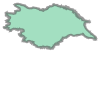

In [18]:
# Yorkshire = 66
polygon = counties['geometry'].iloc[66]
polygon

In [19]:
polygon.centroid.x

-1.3345078941991524

In [20]:
polygon.centroid.y

54.02152195341185

In [21]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

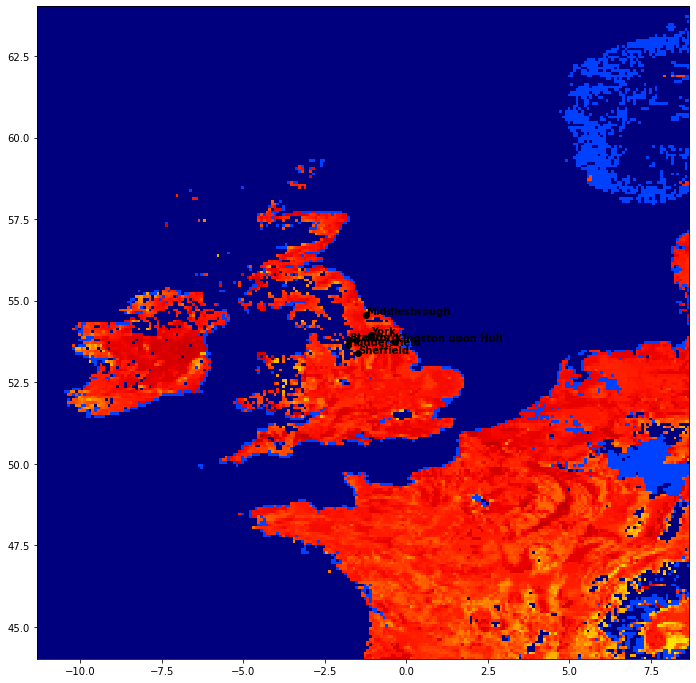

In [22]:
xwidth = 10
ywidth = 10
xc = polygon.centroid.x
yc = polygon.centroid.y

fig, ax = plt.subplots(figsize = (12,12))
show(np.log(dataset.read()+1.1), transform=dataset.transform, ax=ax, cmap = 'jet', interpolation = 'none')
plt.xlim([xc - xwidth, xc + xwidth])
plt.ylim([yc - ywidth, yc + ywidth])

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

In [23]:
## The rest is vestigial!!!

In [24]:
# Now look at more files in a more systematic way - lots from this nice repo
# https://github.com/RaphaelPB/SPAM_data_reader
# which I have dropped in pyourfood/utils for now - is there a better way?
# copy choice lines from SPAM_data_reader.py - is there a better way that preserves more attribution?
SPAM_data_reader_dir = '../../utils/SPAM_data_reader-master/'
import geopandas as gpd
import os
from rasterstats import zonal_stats
import urllib.request
import zipfile


In [25]:
#LOAD DATA
DATAPREFIX='spam2010V1r1_global_' #'spam2017v1r1_ssa_gr_' #SPAM 2010: 
OPTIONFILE=SPAM_data_reader_dir+'SPAM_metadata.xlsx'#'SPAM_metadata_SA2017.xlsx' #File containing options and SPAM metadata
YY='Y' #name of yield variable Y in SPAM 2010, 'YQ' in SPAM 2017 SSA
skpr=10 #Size of header describing inputs in OPTIONFILE

In [26]:
#Shapefiles
nshape=pd.read_excel(OPTIONFILE,sheet_name='SHAPEFILES', skiprows=skpr)['nshape'].values
shapename=pd.read_excel(OPTIONFILE,sheet_name='SHAPEFILES', skiprows=skpr, index_col=[0]).to_dict()['shapename']
shapeIDname=pd.read_excel(OPTIONFILE,sheet_name='SHAPEFILES', skiprows=skpr, index_col=[0]).to_dict()['shapeIDname']

FileNotFoundError: [Errno 2] No such file or directory: '../../utils/SPAM_data_reader-master/SPAM_metadata.xlsx'

In [ ]:
nshape

In [ ]:
shapename

In [ ]:
shapeIDname

In [ ]:
# Take a look at the UK shape somehow

In [ ]:
#load shape
shape = nshape[1]
shapepath = os.path.join(dirname,'Shapefiles',shapename[shape]+('.shp' if '.shp' not in shapename[shape] else ''))
shapefile = gpd.read_file(shapepath)
nshapeid=shapefile[shapeIDname[shape]].values
nshapeid

In [ ]:
#Crops
ncrop = pd.read_excel(OPTIONFILE,sheet_name='SPAMcrops', skiprows=skpr)['scrop'].values
ncrop

In [ ]:
cropignore=pd.read_excel(OPTIONFILE,sheet_name='SPAMcrops', skiprows=skpr, index_col=[0]).to_dict()['cropignore']
ncrop=[c for c in ncrop if cropignore[c]!=1]
cropname=pd.read_excel(OPTIONFILE,sheet_name='SPAMcrops', skiprows=skpr, index_col=[0]).to_dict()['cropname']
cropname

In [ ]:
gcrop=pd.read_excel(OPTIONFILE,sheet_name='GROUPcrops', skiprows=skpr)['gcrop'].values
cropgroup=pd.read_excel(OPTIONFILE,sheet_name='GROUPcrops', skiprows=skpr, index_col=[0])
cropgroup

In [ ]:
#Technologies
ntech=pd.read_excel(OPTIONFILE,sheet_name='SPAMtechs', skiprows=skpr)['stech'].values
techignore=pd.read_excel(OPTIONFILE,sheet_name='SPAMtechs', skiprows=skpr, index_col=[0]).to_dict()['techignore']
ntech=[t for t in ntech if techignore[t]!=1]
techname=pd.read_excel(OPTIONFILE,sheet_name='SPAMtechs', skiprows=skpr, index_col=[0]).to_dict()['techname']
techname

In [ ]:
#Variables
nvar =pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr)['svar'].values
varignore=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['varignore']
nvar=[v for v in nvar if varignore[v]!=1]
varname=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['varname']
varfolder=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['varfolder']
unit_conv_factor=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['unit_conv_factor']
new_var_unit=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['new_var_unit']
new_var_unit

In [ ]:
#download variables settings
varurl=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['varurl']
vardownload=pd.read_excel(OPTIONFILE,sheet_name='SPAMvars', skiprows=skpr, index_col=[0]).to_dict()['vardownload']
#Info
info=pd.read_excel(OPTIONFILE,sheet_name='INFO', skiprows=skpr, index_col=[0])
info

In [ ]:
nvar

In [ ]:
#for var in nvar:
#        for crop in ncrop:
#            for tech in ntech:
#                load_raster_data(SPAM,crop,tech,var,shapefile)
var = nvar[3]
var

In [ ]:
crop = ncrop[0]
crop

In [ ]:
tech = ntech[0]
tech

In [ ]:
raster_name = DATAPREFIX+str(var)+'_'+str(crop)+'_'+str(tech)+'.tif'
raster_path = os.path.join(dirname,varfolder[var],raster_name)
pdata.loc[idx[:,crop,tech],var]=pd.DataFrame(zonal_stats(vectors=shapefile['geometry'], 
                                                         raster=raster_path, all_touched=False, 
                                                         stats='max', add_stats={'mymean':mymean}))['mymean'].values

In [ ]:
if var != YY:  #For Area and Production we sum
    pdata.loc[idx[:,crop,tech],var]=pd.DataFrame(zonal_stats(vectors=shapefile['geometry'], raster=raster_path, all_touched=False, stats='sum'))['sum'].values
else: #For Yield we average (or custom) ('max' stats is not used but an argument needs to be passed)
    pdata.loc[idx[:,crop,tech],var]=pd.DataFrame(zonal_stats(vectors=shapefile['geometry'], raster=raster_path, all_touched=False, stats='max', add_stats={'mymean':mymean}))['mymean'].values